## What
This notebook is a quick research project I perfomed to test the efficacy of knowledge distilattion for "tiny" models. The model was close to the GPT-2 model in many parameters with some modern techniques added.
- thing 1
- thing 2
- thing 3
- etc.

To keep variables to minimum even if the model is not optimal in all aspects, no changed will be done between the two runs except for the way the models are trained.

One model will be trained traiditionally using the one-hot encodings for the next token.

The other will be trained using a softened output of the llama3.2-1B model.

Both models we will evaluated during and after training on zero-shot and few-shot hellaswag, snli, and GLUE benchmarks to evaluate perfomance. Comparing the loss in this scenario is not relevant as the loss calculations are completely different.

## Hella Swag Eval

Olmo 1B scored 0.6071 accuracy_norm on the hella swag eval  
Olmo 1B acc_norm: 0.4893    
gpt-2 124M acc_norm: 0.2955 
gpt-2 1.5B acc_norm: 0.4893 

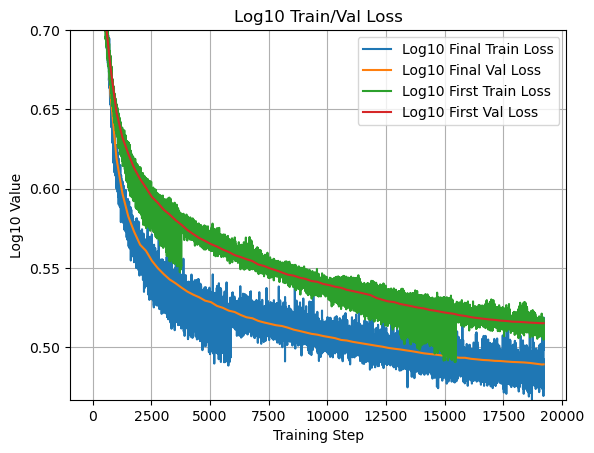

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path_final = "logs/SLM-0.124B_final_control_model_log.txt"
file_path_first = "logs/SLM-0.124B_log.txt"
data_final = pd.read_csv(file_path_final, sep=" ", header=None, names=["index", "label", "value"])
data_first = pd.read_csv(file_path_first, sep=" ", header=None, names=["index", "label", "value"])

train_data_final = data_final[data_final["label"] == "train"]
val_data_final = data_final[data_final["label"] == "val"]
hella_data_final = data_final[data_final["label"] == "hella"]
train_data_first = data_first[data_first["label"] == "train"]
val_data_first = data_first[data_first["label"] == "val"]
hella_data_first = data_first[data_first["label"] == "hella"]

plt.plot(np.log10(train_data_final["value"]), label="Log10 Final Train Loss")
plt.plot(np.log10(val_data_final["value"]), label="Log10 Final Val Loss")

plt.plot(np.log10(train_data_first["value"]), label="Log10 First Train Loss")
plt.plot(np.log10(val_data_first["value"]), label="Log10 First Val Loss")

plt.xlabel('Training Step')
plt.ylabel('Log10 Value')
plt.title('Log10 Train/Val Loss')
plt.ylim(min(np.log10(train_data["value"])), 0.7)
plt.legend()
plt.grid(True)

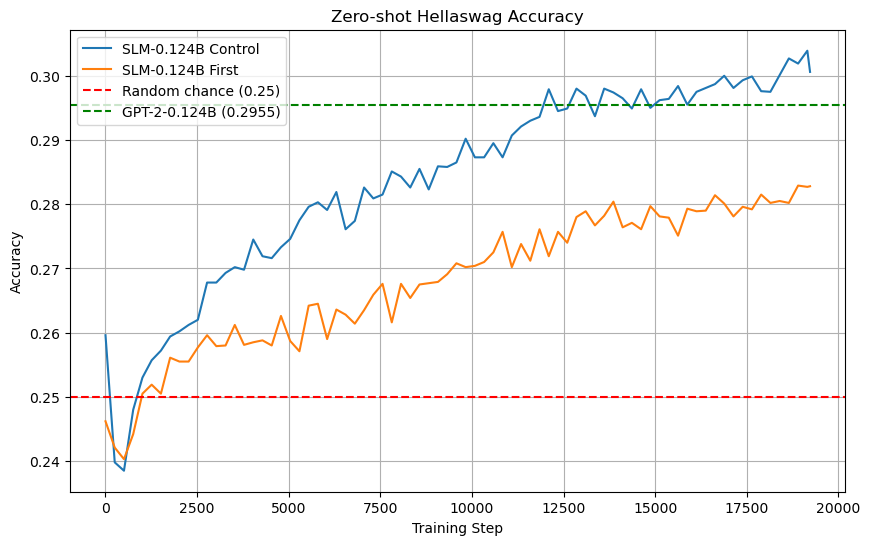

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(hella_data_final["value"], label="SLM-0.124B Control")
plt.plot(hella_data_first["value"], label="SLM-0.124B First")
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Zero-shot Hellaswag Accuracy')

# Add a dotted line at y = 0.25 for random chance accuracy
plt.axhline(y=0.25, color='red', linestyle='--', label='Random chance (0.25)')
plt.axhline(y=0.2955, color='green', linestyle='--', label='GPT-2-0.124B (0.2955)')

plt.legend()
plt.grid(True)

Notablly SLM-0.124B trained 

In [5]:
# Model Testing
from model import SLM
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# teacher = AutoModelForCausalLM.from_pretrained("allenai/OLMo-1B-hf")

# the teacher model has a n_embd of 50304 rather than 50280 like we do in our student model
# increase the vocab size to mathc the teacher model though I think the 50280-50304 tokens are 
# just padding tokens

tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-1B-hf")

''